In [1]:
import argparse
import numpy as np
import pandas as pd
import pickle
import copy
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
import os
import random
from tqdm import tqdm
import torch.nn.functional as F
from collections import Counter
from itertools import islice
import itertools

In [2]:
marker = itertools.cycle(('o', 'v', '^', 's', '8', '<', '>','p'))
#marker = itertools.cycle(('o', 'v', '^', '>','p'))
from matplotlib.lines import Line2D

In [3]:
with open('fashion_mnist_ba_pattern_rounds_9_0.7', 'rb') as f:
    rounds_07 = pickle.load(f)

In [4]:
with open('fashion_mnist_ba_pattern_rounds_9_0.5', 'rb') as f:
    rounds_05 = pickle.load(f)

In [5]:
with open('acc_attack_0.7', 'rb') as f:
    acc_attack_07 = pickle.load(f)

In [6]:
with open('acc_defense_0.7', 'rb') as f:
    acc_defense_07 = pickle.load(f)

In [7]:
with open('basr_attack_0.7', 'rb') as f:
    basr_attack_07 = pickle.load(f)

In [8]:
with open('basr_defense_0.7', 'rb') as f:
    basr_defense_07 = pickle.load(f)

In [9]:
with open('basr_attack_0.5', 'rb') as f:
    basr_attack_05 = pickle.load(f)
with open('basr_defense_0.5', 'rb') as f:
    basr_defense_05 = pickle.load(f)

In [10]:
with open('basr_attack_0.9', 'rb') as f:
    basr_attack_09 = pickle.load(f)
with open('basr_defense_0.9', 'rb') as f:
    basr_defense_09 = pickle.load(f)

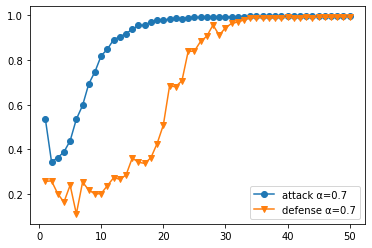

In [11]:
plt.plot(rounds_07[0],basr_attack_07[0],marker=next(marker),label='attack α={}'.format(0.7))
plt.plot(rounds_07[0],basr_defense_07[0],marker=next(marker),label='defense α={}'.format(0.7))
plt.legend()

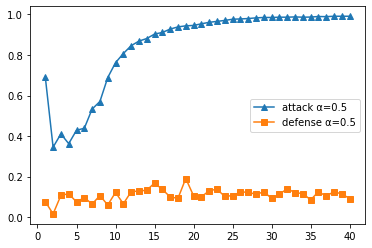

In [12]:
plt.plot(rounds_05[0],basr_defense_05[0],marker=next(marker),label='attack α={}'.format(0.5))
plt.plot(rounds_05[0],basr_attack_05[0],marker=next(marker),label='defense α={}'.format(0.5))
plt.legend()

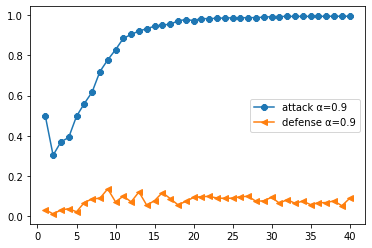

In [13]:
plt.plot(rounds_05[0],basr_attack_09[0],marker=next(marker),label='attack α={}'.format(0.9))
plt.plot(rounds_05[0],basr_defense_09[0],marker=next(marker),label='defense α={}'.format(0.9))
plt.legend()

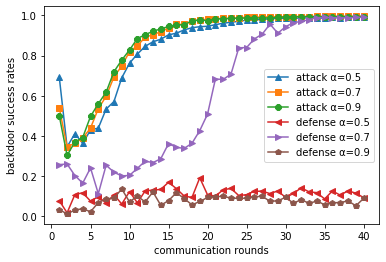

In [44]:

plt.plot(rounds_05[0],basr_defense_05[0],marker=next(marker),label='attack α={}'.format(0.5))
plt.plot(rounds_05[0][:40],basr_attack_07[0][:40],marker=next(marker),label='attack α={}'.format(0.7))
plt.plot(rounds_05[0],basr_attack_09[0],marker=next(marker),label='attack α={}'.format(0.9))
plt.plot(rounds_05[0],basr_attack_05[0],marker=next(marker),label='defense α={}'.format(0.5))
plt.plot(rounds_05[0][:40],basr_defense_07[0][:40],marker=next(marker),label='defense α={}'.format(0.7))
plt.plot(rounds_05[0],basr_defense_09[0],marker=next(marker),label='defense α={}'.format(0.9))
plt.xlabel('communication rounds')
plt.ylabel('backdoor success rates')
plt.legend()
plt.savefig('fm_noniid_ba_30',bbox_inches='tight')

In [33]:
alpha = [0.7]

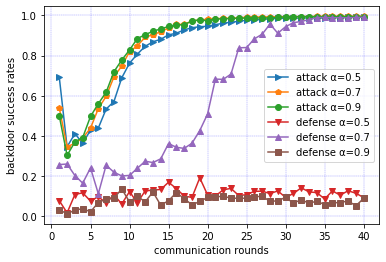

In [14]:

plt.plot(rounds_05[0],basr_defense_05[0],marker=next(marker),label='attack α={}'.format(0.5))
plt.plot(rounds_05[0][:40],basr_attack_07[0][:40],marker=next(marker),label='attack α={}'.format(0.7))
plt.plot(rounds_05[0],basr_attack_09[0],marker=next(marker),label='attack α={}'.format(0.9))
plt.plot(rounds_05[0],basr_attack_05[0],marker=next(marker),label='defense α={}'.format(0.5))
plt.plot(rounds_05[0][:40],basr_defense_07[0][:40],marker=next(marker),label='defense α={}'.format(0.7))
plt.plot(rounds_05[0],basr_defense_09[0],marker=next(marker),label='defense α={}'.format(0.9))
plt.xlabel('communication rounds')
plt.ylabel('backdoor success rates')
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_fm_noniid_ba_30',dpi=200,bbox_inches='tight')